In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv("/content/orders_with_150_anomalies.csv")
df.head()

,order_id,customer_id,order_date,product_id,product_category,quantity,price_per_unit,total_amount
0,O00001,C039,2023-12-22,P179,Grocery,3,321.62,964.86
1,O00002,C022,2024-10-07,P155,Grocery,10,255.39,-39.35
2,O00003,C021,2024-11-01,P020,Furniture,6,339.14,143.59
3,O00004,C042,2024-10-25,P015,Electronics,4,484.49,1937.96
4,O00005,C038,2024-03-02,P197,Grocery,6,264.45,-114.26


In [ ]:
df.tail()

,order_id,customer_id,order_date,product_id,product_category,quantity,price_per_unit,total_amount
145,O00146,C040,2024-08-06,P091,Furniture,9,326.18,NaN
146,O00147,C023,2024-07-05,P078,Books,7,87.84,614.88
147,O00148,C027,2024-09-02,P164,Grocery,3,463.78,1391.34
148,O00149,C038,2023-03-27,P197,Electronics,10,411.30,4113.00
149,O00150,C049,2023-09-01,P169,Grocery,5,63.65,318.25


In [ ]:
df.shape

(150, 8)

**The number of rows in the dataset - 150**
**The number of columns in the dataset - 8**

In [ ]:
df.size

1200

In [ ]:
print(df.dtypes)

order_id             object
customer_id          object
order_date           object
product_id           object
product_category     object
quantity              int64
price_per_unit      float64
total_amount        float64
dtype: object


In [ ]:
df.isna().sum()

,0
order_id,0
customer_id,0
order_date,0
product_id,0
product_category,0
quantity,0
price_per_unit,0
total_amount,25


**There are 25 null values in the total_amount column**

In [ ]:
df["customer_id"].unique()

array(['C039', 'C022', 'C021', 'C042', 'C038', 'C011', 'C046', 'C033',
       'C036', 'C012', 'C029', 'C020', 'C007', 'C040', 'C037', 'C018',
       'C027', 'C049', 'C028', 'C005', 'C008', 'C019', 'C014', 'C030',
       'C032', 'C041', 'C047', 'C043', 'C001', 'C048', 'C025', 'C002',
       'C044', 'C045', 'C024', 'C006', 'C010', 'C023', 'C050', 'C035',
       'C031', 'C003', 'C004', 'C034', 'C017', 'C015', 'C016', 'C009',
       'C026', 'C013'], dtype=object)

In [ ]:
df["customer_id"].nunique()

50

**There are 50 unique customers**

In [ ]:
df.columns

Index(['order_id', 'customer_id', 'order_date', 'product_id',
       'product_category', 'quantity', 'price_per_unit', 'total_amount'],
      dtype='object')

In [ ]:
total_order = df["order_id"].nunique()
unique_customers = df["customer_id"].nunique()

avg_order = total_order/unique_customers
print(avg_order)

3.0


In [ ]:
top_customers = (
    df.groupby('customer_id')['order_id']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)

print(top_customers)

customer_id
C022    8
C007    7
C021    6
C045    6
C040    5
C046    5
C041    5
C023    4
C018    4
C012    4
Name: order_id, dtype: int64


In [ ]:
# Ensure 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Daily Order Trend
daily_orders = df.groupby(df['order_date'].dt.date)['order_id'].nunique()

# Monthly Order Trend
monthly_orders = df.groupby(df['order_date'].dt.to_period('M'))['order_id'].nunique()

# Yearly Order Trend
yearly_orders = df.groupby(df['order_date'].dt.year)['order_id'].nunique()

print("Daily Trend:\n", daily_orders.head())
print("\nMonthly Trend:\n", monthly_orders.head())
print("\nYearly Trend:\n", yearly_orders.head())


Daily Trend:
 order_date
2022-01-14    1
2022-01-26    1
2022-01-28    1
2022-02-02    1
2022-02-16    1
Name: order_id, dtype: int64

Monthly Trend:
 order_date
2022-01    3
2022-02    2
2022-03    1
2022-04    4
2022-05    3
Freq: M, Name: order_id, dtype: int64

Yearly Trend:
 order_date
2022    40
2023    52
2024    58
Name: order_id, dtype: int64


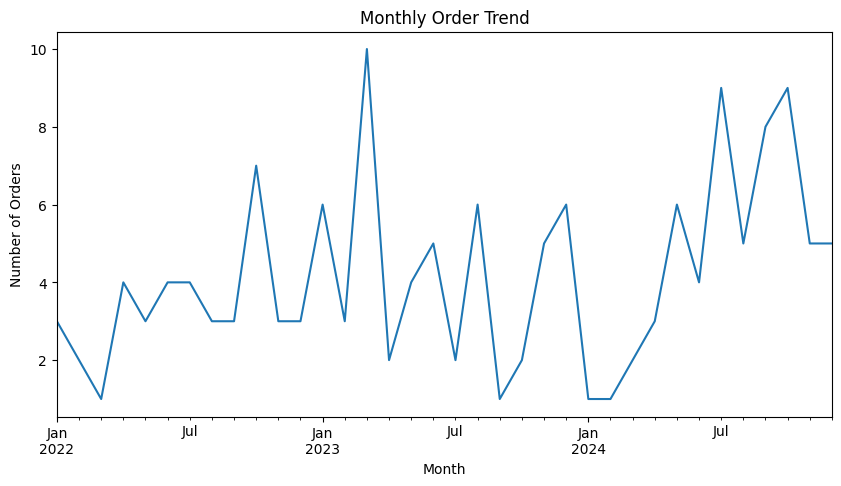

In [ ]:
import matplotlib.pyplot as plt

# Plot Monthly Trend
monthly_orders.plot(kind='line', figsize=(10, 5), title='Monthly Order Trend')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()


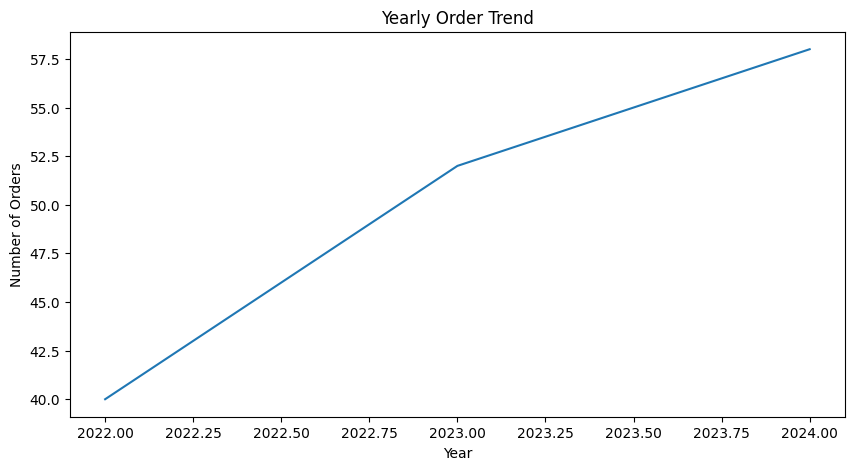

In [ ]:
import matplotlib.pyplot as plt

# Plot Monthly Trend
yearly_orders.plot(kind='line', figsize=(10, 5), title='Yearly Order Trend')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.show()


In [ ]:
# Extract the day of the week (0 = Monday, 6 = Sunday)
df['order_day'] = df['order_date'].dt.dayofweek

# Map numeric days to weekday names
day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Apply the mapping
df['order_day_name'] = df['order_day'].map(day_mapping)

# Group by day name and count orders
weekday_orders = df.groupby('order_day_name')['order_id'].count().sort_values(ascending=False)

print("Peak Order Days:\n", weekday_orders)


Peak Order Days:
 order_day_name
Tuesday      29
Friday       24
Saturday     21
Sunday       21
Wednesday    20
Thursday     18
Monday       17
Name: order_id, dtype: int64


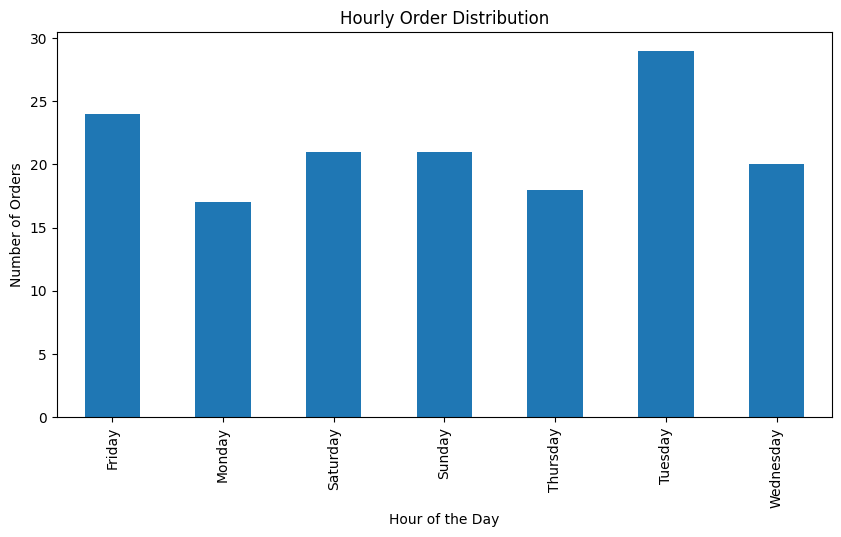

In [ ]:
# Plot Hourly Trend
weekday_orders.sort_index().plot(kind='bar', figsize=(10, 5), title='Hourly Order Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()


In [ ]:
# Count total orders per product category
popular_categories = df.groupby('product_category')['order_id'].count().sort_values(ascending=False).head(1)

print("Most Popular Product Categories:\n", popular_categories)


Most Popular Product Categories:
 product_category
Grocery    45
Name: order_id, dtype: int64


**Grocery is the most popular category**

In [ ]:
# Sum of quantities per product to find best-sellers
top_products = df.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)

print("Top 10 Best-Selling Products:\n", top_products)


Top 10 Best-Selling Products:
 product_id
P187    28
P151    27
P197    25
P199    23
P155    20
P169    18
P190    18
P168    16
P164    15
P096    15
Name: quantity, dtype: int64


In [ ]:
df.head()

,order_id,customer_id,order_date,product_id,product_category,quantity,price_per_unit,total_amount,order_day,order_day_name
0,O00001,C039,2023-12-22,P179,Grocery,3,321.62,964.86,4,Friday
1,O00002,C022,2024-10-07,P155,Grocery,10,255.39,-39.35,0,Monday
2,O00003,C021,2024-11-01,P020,Furniture,6,339.14,143.59,4,Friday
3,O00004,C042,2024-10-25,P015,Electronics,4,484.49,1937.96,4,Friday
4,O00005,C038,2024-03-02,P197,Grocery,6,264.45,-114.26,5,Saturday


In [ ]:
# Average quantity ordered per product category
avg_quantity_per_category = df.groupby('product_category')['quantity'].mean().sort_values(ascending=False)

print("Average Quantity Ordered per Product Category:\n", avg_quantity_per_category)


Average Quantity Ordered per Product Category:
 product_category
Clothing       6.250000
Books          5.812500
Furniture      5.655172
Electronics    5.607143
Grocery        5.577778
Name: quantity, dtype: float64


In [ ]:
# Total revenue from all orders
total_revenue = df['total_amount'].sum()

print(f"Total Revenue: ${total_revenue:.2f}")


Total Revenue: $152977.67


In [ ]:
# Total number of orders
total_orders = df['order_id'].nunique()

# Average Order Value
average_order_value = total_revenue / total_orders

print(f"Average Order Value: ${average_order_value:.2f}")


Average Order Value: $1019.85


In [ ]:
# Ensure 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Group by date for daily sales
daily_sales = df.groupby(df['order_date'].dt.date)['total_amount'].sum()

print("Daily Sales Trend:\n", daily_sales.head())


Daily Sales Trend:
 order_date
2022-01-14    4328.20
2022-01-26     164.82
2022-01-28    1387.64
2022-02-02    3227.13
2022-02-16    -153.52
Name: total_amount, dtype: float64


In [ ]:
# Group by month for monthly sales
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['total_amount'].sum()

print("Monthly Sales Trend:\n", monthly_sales.head())

Monthly Sales Trend:
 order_date
2022-01    5880.66
2022-02    3073.61
2022-03    2865.87
2022-04    5426.33
2022-05    2308.18
Freq: M, Name: total_amount, dtype: float64


In [ ]:
# Group by year for yearly sales
yearly_sales = df.groupby(df['order_date'].dt.year)['total_amount'].sum()

print("Yearly Sales Trend:\n", yearly_sales)

Yearly Sales Trend:
 order_date
2022    38355.91
2023    60146.93
2024    54474.83
Name: total_amount, dtype: float64


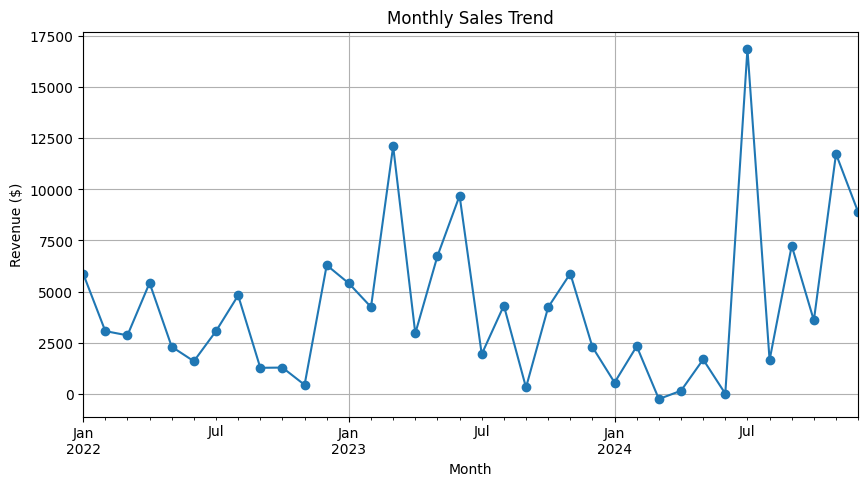

In [ ]:
import matplotlib.pyplot as plt

# Plot Monthly Sales Trend
monthly_sales.plot(kind='line', marker='o', figsize=(10, 5), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()
